In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSFT_weekly_adjusted_stock_prize.csv to MSFT_weekly_adjusted_stock_prize.csv


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [13]:
df = pd.read_csv('MSFT_weekly_adjusted_stock_prize.csv')
df.head()

,Unnamed: 0,Openning Values,Highest Values,Lowest Values,Closing Values,Adjusted Closing Values,Volume of Stocks,Divident Amount
0,2023-10-06,316.28,329.19,311.215,327.26,327.26,104962901,0.0
1,2023-09-29,316.59,319.47,309.450,315.75,315.75,107374481,0.0
2,2023-09-22,327.80,330.40,315.000,317.01,317.01,111793469,0.0
3,2023-09-15,337.24,340.86,329.650,330.22,330.22,108640058,0.0
4,2023-09-08,329.00,336.16,328.660,334.27,334.27,74018792,0.0


In [19]:
data = df[['Closing Values']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])
data = df[['Closing Values']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10,batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0209
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 7.3731e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.8004e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 7.5074e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 5.1872e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 5.3775e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 9.9704e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 8.2692e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 4.3411e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 4.8262e-04


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


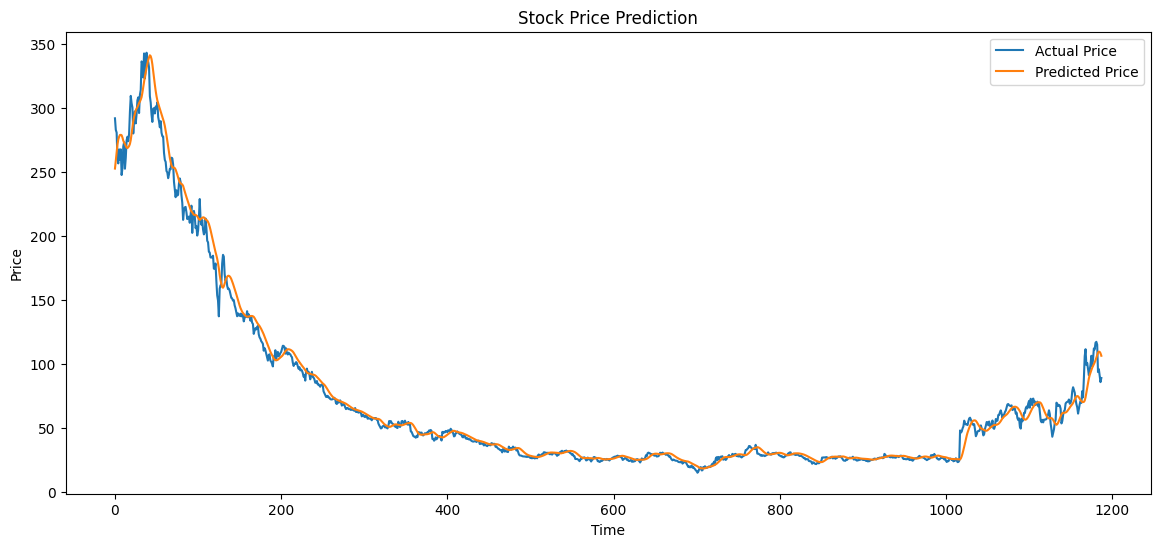

In [21]:
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

plt.figure(figsize=(14,6))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()